In [4]:
from __future__ import print_function, division
import requests
url = 'https://en.wikipedia.org/wiki/Nicolas_Cage_filmography'

response = requests.get(url)

In [5]:
response.ok

True

In [7]:
page = response.text

In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page,"lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Nicolas Cage filmography - Wikipedia, the free encyclopedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Nicolas_Cage_filmography","wgTitle":"Nicolas Cage filmography","wgCurRevisionId":716315821,"wgRevisionId":716315821,"wgArticleId":39203364,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia introduction cleanup from February 2016","All pages needing cleanup","Articles covered by WikiProject Wikify from February 2016","All articles covered by WikiProject Wikify","Articles needing additional references from February 2016"

In [82]:
import pandas as pd
import numpy as np
import re
#cells = np.array([])
cells=soup.find(class_='wikitable sortable').find_all('td')

year = pd.Series()
title = pd.Series()
year=[str(re.search('\d+',cells[i].text).group()) for i in range(0,len(cells),4)]


    

['1982',
 '1983',
 '1983',
 '1984',
 '1984',
 '1984',
 '1986',
 '1986',
 '1987',
 '1987',
 '1989',
 '1989',
 '1989',
 '1990',
 '1990',
 '1991',
 '1992',
 '1993',
 '1993',
 '1994',
 '1994',
 '1994',
 '1994',
 '1995',
 '1995',
 '1996',
 '1997',
 '1997',
 '1998',
 '1998',
 '1999',
 '1999',
 '2000',
 '2000',
 '2001',
 '2001',
 '2002',
 '2002',
 '2002',
 '2003',
 '2004',
 '2005',
 '2005',
 '2006',
 '2006',
 '2006',
 '2007',
 '2007',
 '2007',
 '2007',
 '2008',
 '2009',
 '2009',
 '2009',
 '2009',
 '2010',
 '2010',
 '2010',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2012',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016']

In [95]:
#for a lsit of given URL structures, download the response into a dictionary object with year as key;
#pickle this dictionary: DICTIONARY OF ALL WIKI PAGES OF FILM LISTS SINCE 1970
from pprint import pprint
import pickle

urlConst = 'https://en.wikipedia.org/wiki/List_of_American_films_of_'
urlList = [urlConst+str(i) for i in range(1970, 2017)]

soupObjects={}

for url in urlList:
    try:
        resp = requests.get(url)
        soupObjects[str(re.search('\d+$',url).group())] = BeautifulSoup(resp.text,'lxml')
    except requests.exceptions.RequestException as e:
        print(e)
        sys.exit(1)

#pickle.dump(soupObjects,open('WikiPagesOfFilms_1970_2006.p','wb'))


In [107]:
import sys
sys.setrecursionlimit(100000)
pickle.dump(soupObjects,open('WikiPagesOfFilms_1970_2006.p','wb'))



In [150]:
soup.findNextSibling?

In [247]:

#k,v=soupObjects.items()
title=pd.Series([],name='title')
director=pd.Series([],name='director')
cast=pd.Series([],name='cast')
genre=pd.Series([],name='genre')
studios=pd.Series([],name='studios')
releaseDate=pd.Series([],name='releaseDate')

year1 = [str(i) for i in range(1970,2013)]
#year2 = [str(i) for i in range(2012,2014)]
year2 = [str(i) for i in range(2014,2016)]

#print(v.prettify())

for year in year1:
    for table in soupObjects[year].find_all(class_='wikitable'):
         for row in table.find_all('tr'):
            #print("YEAR = "+year+"\n")
            #print("*****NEW ROW HERE******************")
            r = row.find_all('td')
            if not(r):
                #r = row.findNextSibling()
                continue
            #print(len(r))
        
            try:
                title=title.append(pd.Series(r[0].text))
            except IndexError:
                title=title.append(pd.Series('NA'))

            try:
                director=director.append(pd.Series(r[1].text))
            except IndexError:
                director=director.append(pd.Series('NA'))

            try:
                cast=cast.append(pd.Series(r[2].text))
            except IndexError:
                cast=cast.append(pd.Series('NA'))

            try:
                genre=genre.append(pd.Series(r[3].text))
            except IndexError:
                genre=genre.append(pd.Series('NA'))

            try:
                studios=studios.append(pd.Series(r[4].text))
            except IndexError:
                studios=studios.append(pd.Series('NA'))

            try:
                releaseDate=releaseDate.append(pd.Series(r[5].text))
            except IndexError:
                releaseDate=releaseDate.append(pd.Series('NA'))

            
                     
    
        #print(re.search('>\w<',str(r)).group(1))


In [285]:
dat = pd.concat([title,director,cast,genre,studios,releaseDate], axis=1)
dat.columns = ['title','director','cast','genre','studios','releaseDate']
dat.index = dat['title']

pickle.dump(dat,open('DF_WikiPagesOfFilms_1970_2013.p','wb'))



In [318]:
dat.head(20)

,title,director,cast,genre,studios,releaseDate
title,,,,,,
Adam at Six A.M.,Adam at Six A.M.,Robert Scheerer,"Michael Douglas, Lee Purcell, Joe Don Baker, L...",Drama,,NA
The Adventurers,The Adventurers,Lewis Gilbert,"Bekim Fehmiu, Candice Bergen, Charles Aznavour...",Drama,From Harold Robbins novel,NA
Airport,Airport,George Seaton,"Burt Lancaster, Dean Martin, Jean Seberg, Jacq...",Disaster film,based on Arthur Hailey novel; 10 Oscar nominat...,NA
Alex in Wonderland,Alex in Wonderland,Paul Mazursky,"Donald Sutherland, Ellen Burstyn, Federico Fel...","Comedy, Drama",,NA
The Angel Levine,The Angel Levine,Ján Kadár,"Zero Mostel, Harry Belafonte, Ida Kaminska",Drama,,NA
The Aristocats,The Aristocats,Wolfgang Reitherman,"Phil Harris, Eva Gabor, Gary Dubin",Animation,Disney,NA
The Baby Maker,The Baby Maker,James Bridges,"Barbara Hershey, Collin Wilcox Paxton, Scott G...",Drama,National General Pictures,NA
The Ballad of Cable Hogue,The Ballad of Cable Hogue,Sam Peckinpah,"Jason Robards, Stella Stevens, David Warner",Western,Warner Bros.,NA
Barquero,Barquero,Gordon Douglas,"Lee Van Cleef, Warren Oates",Western,,NA


In [357]:
#URL rules for boxofficemojo
# strip spaces
# strip "the" at the beginning
# get all words before the ":" character only
# strip all other special characters
# tolower everything

def get_cannonical_URLs(sourceURL,titles):
    urlList = []

    for url in titles:
        urlList.append(str(sourceURL+(re.sub(r'^[Tt]he',"",
                                             re.sub('[^\w\d-]',"",
                                                    re.sub(r':.*',"",url)))).lower() + ".htm"))


    return urlList



In [437]:
"""
urlList = get_cannonical_URLs("http://www.boxofficemojo.com/movies/?id=",dat.title)

soupObjects={}

for url in urlList:
    try:
        resp = requests.get(url)
        soupObjects[str(re.search('\w+(?=\.htm)',url).group())] = BeautifulSoup(resp.text,'lxml')
    except requests.exceptions.RequestException as e:
        print(e)
        sys.exit(1)
"""

#we have urls, now fetch pages into dict. there are lot, so space out requests, and do it in chunks (2.5% each time). 
import time
import sys

soupObjects={}
urlListChunks = range(0,len(urlList)-1,int(len(urlList)/40))
urlListChunks.append(len(urlList)-1)

for chunkInd in range(len(urlListChunks)-1):
    print("URL chunk... %s of %s in 12 seconds...\n" % (str(chunkInd), str(len(urlListChunks)-1)))
    time.sleep(12)
    print("Fetching URLs in urlList location: %s to %s \n" % (urlListChunks[chunkInd],urlListChunks[chunkInd+1]))
    for url in urlList[urlListChunks[chunkInd]:urlListChunks[chunkInd+1]]:
            try:
                #time.sleep(0.2)
                resp = requests.get(url)
                soupObjects[str(re.search('\w+(?=\.htm)',url).group())] = BeautifulSoup(resp.text,'lxml')
            except requests.exceptions.RequestException as e:
                print(e)
                sys.exit(1)

URL chunk... 0 of 41 in 12 seconds...

Fetching URLs in urlList location: 0 to 228 

URL chunk... 1 of 41 in 12 seconds...

Fetching URLs in urlList location: 228 to 456 

URL chunk... 2 of 41 in 12 seconds...

Fetching URLs in urlList location: 456 to 684 

URL chunk... 3 of 41 in 12 seconds...

Fetching URLs in urlList location: 684 to 912 

URL chunk... 4 of 41 in 12 seconds...

Fetching URLs in urlList location: 912 to 1140 

URL chunk... 5 of 41 in 12 seconds...

Fetching URLs in urlList location: 1140 to 1368 

URL chunk... 6 of 41 in 12 seconds...

Fetching URLs in urlList location: 1368 to 1596 

URL chunk... 7 of 41 in 12 seconds...

Fetching URLs in urlList location: 1596 to 1824 

URL chunk... 8 of 41 in 12 seconds...

Fetching URLs in urlList location: 1824 to 2052 

URL chunk... 9 of 41 in 12 seconds...

Fetching URLs in urlList location: 2052 to 2280 

URL chunk... 10 of 41 in 12 seconds...

Fetching URLs in urlList location: 2280 to 2508 

URL chunk... 11 of 41 in 12 sec

In [438]:
#pickle.dump(soupObjects,open('DICT_BOMOJO_1.p','wb'))

In [791]:
#dat['canontitle'] = dat.apply(lambda row: re.sub(r'^[Tt]he',"", re.sub('[^\w\d-]',"", re.sub(r':.*',"",row.title))).lower(), axis=1)
#pd.Series((re.sub(r'^[Tt]he',"", re.sub('[^\w\d-]',"", re.sub(r':.*',"",dat.title)))).lower())

#del dat.rev_opening
#del dat.rev_totalGross
#del dat.rev_todate
#dat.columns
#dat.drop(dat.columns[[7,8,9]], axis=1,inplace=True)
#dat.columns

#i=2550
#if str(dat.canontitle[i]) in soupObjects.keys():
        #then extract whatever from soupObjects[dat.canontitle] and assign to dat columns in ith row
soup = soupObjects['ronin']
direc = soup.find(text=re.compile('Distributor:'))

rand = str(direc.findNextSibling().text)

print(rand)
#wideRel = soup.find(text=re.compile('\d+ theaters'))
#cell=[]
#pprint(int(re.sub('[^\d+]','',re.search(' \d+ (?=theaters)',re.sub(',','',wideRel)).group())))

#for el in soup[1]:
#    cell.extend(el)
    
    #for row in cell:
       # block=row.find(text=re.compile('Opening\xa0Weekend:'))
        #if block:
         #   print(block.findNextSibling())
#pprint(int(re.sub(r'[^\d]','',cell[2].find_all('td')[1].text)))
#dat.drop('rev_postOpening',axis=1,inplace=True)
#if totGross:
#print(opWknd)
#import dateutil.parser as parse
#pprint(parse.parse(str(relDate.findNextSibling().text)))
dat.columns

MGM


Index([u'title', u'director', u'cast', u'genre', u'studios', u'releaseDate',
       u'canontitle', u'rev_totalGross', u'rev_opening', u'num_theaters',
       u'distributor', u'genre_bomojo', u'runtime', u'prod_budget', u'rating'],
      dtype='object')

In [798]:
%%time
import dateutil.parser as parse
#dat['rev_totalGross'] = pd.Series() #column index=7
#dat['rev_opening'] = pd.Series() #column index=8
#dat['num_theaters'] = pd.Series() #column index=9
#dat['distributor'] = pd.Series(dtype='string') #column index=10
#dat['genre_bomojo'] = pd.Series(dtype=str) #column index=11
#dat['runtime'] = pd.Series() #column index=12
#dat['prod_budget'] = pd.Series() #column index=13
#dat['rating'] = pd.Series() #column index=14



for i in range(len(dat.canontitle)-1):
    if str(dat.canontitle[i]) in soupObjects.keys():
        #then extract whatever from soupObjects[dat.canontitle] and assign to dat columns in ith row
        soup = soupObjects[str(dat.canontitle[i])]
        
        #distributor (studio)
        #distributor = soup.find(text=re.compile('Distributor:'))
        #genre from bomojo
        #genre = soup.find(text=re.compile('Genre:'))
        #runtime 
        runtime = soup.find(text=re.compile('Runtime:'))
        #production budget
        #pb = soup.find(text=re.compile('Production Budget:'))
        # MPAA rating
        #rating = soup.find(text=re.compile('MPAA Rating:'))
        
        #total gross rev
        #totGross = soup.find(text=re.compile('Domestic:'))
        #release date
        #relDate = soup.find(text=re.compile('Release Date:'))
        #number of opening theaters
        #numThtr = soup.find(text=re.compile('\d+ theaters'))        
        
        #try:
        #if distributor:
            #dat.set_value(i,10,distributor.findNextSibling().text, takeable=True)
            #dat.ix[i,10]=str(distributor.findNextSibling().text)

        #if genre:
            #dat.set_value(i,11,str(genre.findNextSibling().text), takeable=True)
            #dat.ix[i,11]=str(genre.findNextSibling().text)

        if runtime:
            #dat.set_value(i,12,str(runtime.findNextSibling().text), takeable=True)
            dat.ix[i,12]=str(runtime.findNextSibling().text)

        if pb:
            #dat.set_value(i,13,str(re.sub('[^\d|\w]','',pb.findNextSibling().text)), takeable=True)
            dat.ix[i,13]=str(re.sub('[^\d|\w]','',pb.findNextSibling().text))


        if rating:
            #dat.set_value(i,14,str(rating.findNextSibling().text), takeable=True)
            dat.ix[i,14]=str(rating.findNextSibling().text)
                
            #if totGross:
            #    try:
            #        dat.set_value(i,7,int(re.sub('[^\d]','',totGross.findNextSibling().text)), takeable=True)
            #    except ValueError:
            #        continue

            #if numThtr:
            #    try:
            #        dat.set_value(i,9,int(re.sub('[^\d+]','',re.search(' \d+ (?=theaters)',re.sub(',','',numThtr)).group())), takeable=True)
            #    except ValueError:
            #        continue
            #    except AttributeError:
            #        continue

            #if relDate:
            #    try:
            #        dat.set_value(i,5,parse.parse(str(relDate.findNextSibling().text)), takeable=True)
            #    except ValueError:
            #        continue
        #except ValueError or AttributeError:
            #continue
        
        
        #opening weekend rev
        #soup = soupObjects[str(dat.canontitle[i])].find_all(class_='mp_box_content')
        #cell=[]
        #del cell[:]
        #try:
        #    for el in soup[1]:
        #        cell.extend(el)
        #    dat.set_value(i,8,int(re.sub(r'[^\d]','',cell[2].find_all('td')[1].text)), takeable=True)         
        #except IndexError:
        #    continue
        #except ValueError:
        #    continue
        #except AttributeError:
        #    continue
    
        
        




CPU times: user 5min 17s, sys: 1.66 s, total: 5min 19s
Wall time: 5min 23s


In [804]:
#dat.drop('rev_postOpening',axis=1)
dat.sample(5)

,title,director,cast,genre,studios,releaseDate,canontitle,rev_totalGross,rev_opening,num_theaters,distributor,genre_bomojo,runtime,prod_budget,rating,rev_postOpening
title,,,,,,,,,,,,,,,,
Madonna: Truth or Dare,Madonna: Truth or Dare,Alek Keshishian,Madonna,Documentary,,NA,madonna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Alamo: 13 Days to Glory,The Alamo: 13 Days to Glory,Burt Kennedy,"Brian Keith, James Arness, Alec Baldwin, Raúl ...","Western, Biography",made for TV,2004-04-09 00:00:00,alamo,22414961,9124701,2609,Buena Vista,War,2 hrs. 17 min.,107million,PG-13,13290260
Red State,Red State,Kevin Smith,"Michael Angarano, Kerry Bishé, Nicholas Braun,...",Horror,"SModcast Pictures, Lionsgate",2011-03-05 00:00:00,redstate,1104682,204230,1,SModcast Pictures,Horror Thriller,1 hrs. 37 min.,NA,R,900452
Dr. Seuss' The Lorax,Dr. Seuss' The Lorax,"Chris Renaud, Kyle Balda","Danny DeVito, Zac Efron, Taylor Swift, Ed Helm...","Animated, Family","Universal Pictures, Illumination Entertainment...",March 2,drseussthelorax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jack Smith and the Destruction of Atlantis,Jack Smith and the Destruction of Atlantis,Mary Jordan,life of director Jack Smith,Documentary,,NA,jacksmithandthedestructionofatlantis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [964]:
#pickle.dump(dat,open('Movie_DF_16_datapoints.p','wb'))

######### ################  Cleaning and feature manipulation!!
# Create post_opening_rev feature
#dat_eda[['title','releaseDate']]
#dat_eda.sample(1)
del dat_eda

In [965]:
# let's only use the data points for which BOMOJO returned matches
dat_eda = dat.loc[dat.rev_totalGross.notnull(),:]
#dat_eda['rev_postOpening'] = dat_eda.apply(lambda row: row.rev_totalGross - row.rev_opening, axis=1)



In [966]:
dat_eda.releaseDate=pd.to_datetime(dat_eda.releaseDate, errors='coerce')

#dat_eda.releaseDate.convert_objects(convert_dates='coerce')

In [967]:
# Step 4: Categorize columns director, genre, distributor, genre_bomojo, rating
dat_eda=pd.concat([ dat_eda[['director','cast','genre','studios','distributor','genre_bomojo','rating']].apply(lambda col: col.astype('category'), axis=0),
          dat_eda[['title','releaseDate','canontitle','rev_totalGross','rev_opening','num_theaters','runtime','prod_budget','rev_postOpening']] ], 
                  axis=1)

In [968]:
#dat_eda.describe(include='all')
#pickle.dump(dat_eda,open('Movie_DF_latest.p','wb'))
dat_eda.head(5)

,director,cast,genre,studios,distributor,genre_bomojo,rating,title,releaseDate,canontitle,rev_totalGross,rev_opening,num_theaters,runtime,prod_budget,rev_postOpening
title,,,,,,,,,,,,,,,,
Airport,George Seaton,"Burt Lancaster, Dean Martin, Jean Seberg, Jacq...",Disaster film,based on Arthur Hailey novel; 10 Oscar nominat...,Universal,Drama / Thriller,G,Airport,1970-03-05,airport,100489151,NaN,NaN,2 hrs. 17 min.,10million,NaN
Beneath the Planet of the Apes,Ted Post,"James Franciscus, Kim Hunter, Maurice Evans, L...",Science fiction,Planet of the Apes sequel,Fox,Sci-Fi Adventure,G,Beneath the Planet of the Apes,1970-05-27,beneaththeplanetoftheapes,18999718,NaN,NaN,1 hrs. 35 min.,NA,NaN
Equinox,Jack Woods,Frank Bonner,Horror,,IRS Media,Unknown,R,Equinox,1993-06-11,equinox,279627,6310,1740,1 hrs. 50 min.,NA,273317
Getting Straight,Richard Rush,"Elliott Gould, Candice Bergen",Comedy,Columbia,Columbia,Drama,R,Getting Straight,1970-05-13,gettingstraight,13300000,NaN,NaN,2 hrs. 4 min.,NA,NaN
Gimme Shelter,Albert and David Maysles,The Rolling Stones,Documentary,,Roadside Attractions,Drama,PG-13,Gimme Shelter,2014-01-24,gimmeshelter,1359910,689070,385,1 hrs. 40 min.,NA,670840


In [969]:
dat_eda['leadActor']=dat_eda.cast.apply(lambda val: re.split(r',',val)[0]).astype('category')


In [972]:
dat_eda.sample(5)

,director,cast,genre,studios,distributor,genre_bomojo,rating,title,releaseDate,canontitle,rev_totalGross,rev_opening,num_theaters,runtime,prod_budget,rev_postOpening,leadActor
title,,,,,,,,,,,,,,,,,
Keane,Lodge Kerrigan,"Damian Lewis, Abigail Breslin, Amy Ryan",Thriller,,Magnolia,Drama,R,Keane,2005-09-09,keane,33256,6151,1,1 hrs. 40 min.,850000,27105,Damian Lewis
Titanic 3D,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",Drama,"Paramount Pictures, 20th Century Fox, Lightsto...",Paramount,Romance,PG-13,Titanic 3D,2012-04-04,titanic3d,57884114,17285453,2674,3 hrs. 14 min.,18million,40598661,Leonardo DiCaprio
Hit Man,George Armitage,"Bernie Casey, Pam Grier",Crime,MGM,Cannon Films,Action,R,Hit Man,1991-10-25,hitman,4654288,1290442,551,1 hrs. 34 min.,NA,3363846,Bernie Casey
Brain Donors,Dennis Dugan,"John Turturro, Mel Smith, Nancy Marchand",Comedy,Marx Brothers parody,Paramount,Comedy,PG,Brain Donors,1992-04-17,braindonors,918239,504057,1740,1 hrs. 19 min.,NA,414182,John Turturro
Dream a Little Dream,Marc Rocco,"Corey Feldman, Corey Haim, Meredith Salenger, ...",Comedy,,Vestron,Comedy,PG-13,Dream a Little Dream,1989-03-03,dreamalittledream,5552441,2568963,1019,1 hrs. 54 min.,NA,2983478,Corey Feldman


In [973]:
dat_eda.drop(['studios','cast','genre'], axis=1, inplace=True)

In [989]:
#dat.runtime.sample(5)
#dat_eda['runtime']=dat_eda.runtime.str.replace('N/A','0', case=False)
#dat_eda['runtime_mins']=(dat_eda.runtime.str.split(' ').str.get(0).astype('float'))*60 + (dat_eda.runtime.str.split(' ').str.get(2).astype('float'))

dat_eda.sample(5)


,director,distributor,genre_bomojo,rating,title,releaseDate,canontitle,rev_totalGross,rev_opening,num_theaters,runtime,prod_budget,rev_postOpening,leadActor,runtime_mins
title,,,,,,,,,,,,,,,
The January Man,Pat O'Connor,MGM,Unknown,R,The January Man,1989-01-13,januaryman,4611062,1716442,876,1 hrs. 37 min.,NA,2894620,Kevin Kline,97
Cutthroat Island,Renny Harlin,MGM,Period Adventure,PG-13,Cutthroat Island,1995-12-22,cutthroatisland,10017322,2371415,1619,2 hrs. 3 min.,98million,7645907,Geena Davis,123
Small Soldiers,Joe Dante,DreamWorks,Family Comedy,PG-13,Small Soldiers,1998-07-10,smallsoldiers,54682547,14047592,2539,1 hrs. 50 min.,NA,40634955,Gregory Smith,110
Jailbait,Brett C. Leonard,Kindred Media Group,Drama,R,Jailbait,2006-08-04,jailbait,5741,1890,2,1 hrs. 28 min.,NA,3851,Michael Pitt,88
Hair,Miloš Forman,MGM,Musical,PG,Hair,1979-03-14,hair,15284643,NaN,NaN,2 hrs. 1 min.,11million,NaN,Treat Williams,121


In [995]:
dat_eda['prod_budget']=dat_eda.prod_budget.str.replace('million','000000',case=False)
dat_eda['prod_budget']=dat_eda.prod_budget.str.replace('N/A|NA','0',case=False)

In [1006]:
dat_eda['prod_budget']=dat_eda.prod_budget.astype('float')

In [1011]:
dat_eda.prod_budget.sample(5)

title
La Bamba                     0
Man of the House             0
Dunston Checks In            0
Speed Racer          120000000
Fair Game             50000000
Name: prod_budget, dtype: float64

In [1024]:
#pickle.dump(dat_eda,open('Movie_DF_latest_apr24_10pm.p','wb'))
import numpy as np
np.exp(500)/np.exp(100)

5.2214696897641443e+173

In [1013]:
mov = dat_eda

In [1015]:
mov.describe()

,rev_totalGross,rev_opening,num_theaters,prod_budget,rev_postOpening,runtime_mins
count,5.573000e+03,5.178000e+03,5162.000000,5.573000e+03,5.178000e+03,5557.000000
mean,3.119000e+07,7.839868e+09,1491.566253,1.754752e+07,-7.807741e+09,105.314018
std,4.923247e+07,3.826763e+10,1017.006941,5.113478e+07,3.826509e+10,17.769498
min,3.000000e+01,2.000000e+00,1.000000,0.000000e+00,-3.119862e+11,45.000000
25%,2.700000e+06,3.113888e+05,701.000000,0.000000e+00,1.031446e+06,94.000000
50%,1.406333e+07,4.249892e+06,1680.000000,0.000000e+00,7.802110e+06,102.000000
75%,3.857777e+07,1.207537e+07,2155.000000,2.000000e+07,2.562174e+07,113.000000
max,7.497661e+08,3.120082e+11,4380.000000,1.499000e+09,6.727407e+08,263.000000


In [1038]:
mov['rev_fraction'] = mov.rev_postOpening/mov.rev_opening
mov.ix[mov.prod_budget==0,'prod_budget'] = np.nan

In [1059]:
mov['CULT_INDEX'] = (mov.rev_postOpening**2)/((mov.prod_budget**4) * (mov.rev_opening**2) * mov.num_theaters**2)

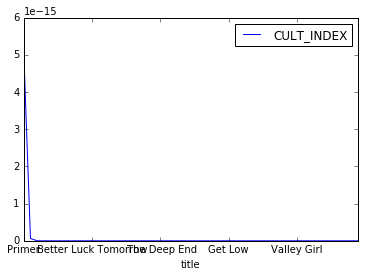

In [1069]:
%matplotlib inline
mov.sort_values(by='CULT_INDEX', ascending=False).head(50).plot(y='CULT_INDEX')

In [1049]:
157396568**2/(11000000*(10384392)*1006)

0.2155851175821998

In [1042]:
2.7**15

2954312.7065508366